# Data Set Information:

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

There are four datasets:
1) bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]
2) bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.
3) bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs).
4) bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs).
The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM).

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).


Attribute Information:

Input variables:
# bank client data:
* 1 - age (numeric)
* 2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
* 3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
* 4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
* 5 - default: has credit in default? (categorical: 'no','yes','unknown')
* 6 - housing: has housing loan? (categorical: 'no','yes','unknown')
* 7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
* 8 - contact: contact communication type (categorical: 'cellular','telephone')
* 9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
* 10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
* 11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
* 12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* 13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
* 14 - previous: number of contacts performed before this campaign and for this client (numeric)
* 15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
* 16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
* 17 - cons.price.idx: consumer price index - monthly indicator (numeric)
* 18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
* 19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
* 20 - nr.employed: number of employees - quarterly indicator (numeric)

# Output variable (desired target):
* 21 - y - has the client subscribed a term deposit? (binary: 'yes','no')



# The approach followed:

* 1. We first need to analyse the data on whole and perform cleaning on the data.
* 2. Remove the unwanted features and one-hot encode the categorical data into binary data.
* 3. Divide the data into Predictors and target variable( here its 'y')
* 4. Split the data into test and training sets with test sizes 20%, 40%, 50% and select the best for both Decission Tree and Random Forest classifiers.
* 5. Once we select the test size, we need to analyse the parameters for the both the models based on the accuracy and based on that we should select the best parameter for them.
* 6. Once we are good with parameters, we need to predict the outputs for the models with best parameters on test data and obtain the classification report and confusion matrix for both models.
* 7. Based on the output and reports, decide on the best model to work with on this kind of data.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
loans = pd.read_csv('bank-additional-full.csv',sep=';')

In [9]:
loans.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [10]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [11]:
loans.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


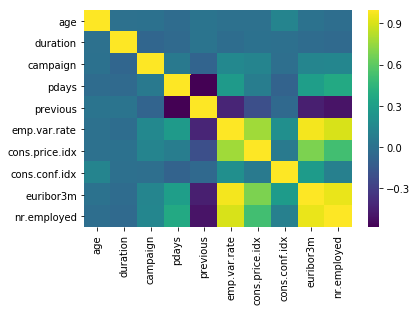

In [12]:
sns.heatmap(loans.corr(),cmap='viridis')

In [13]:
loans.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Text(0.5,0,'duration')

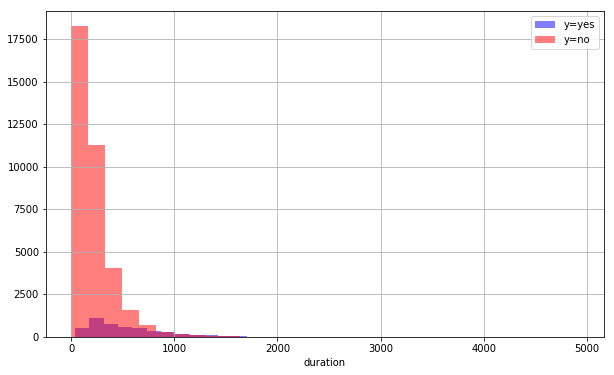

In [14]:
plt.figure(figsize=(10,6))
loans[loans['y']=='yes']['duration'].hist(alpha=0.5,color='blue',
                                              bins=30,label='y=yes')
loans[loans['y']=='no']['duration'].hist(alpha=0.5,color='red',
                                              bins=30,label='y=no')
plt.legend()
plt.xlabel('duration')

Text(0.5,0,'pdays')

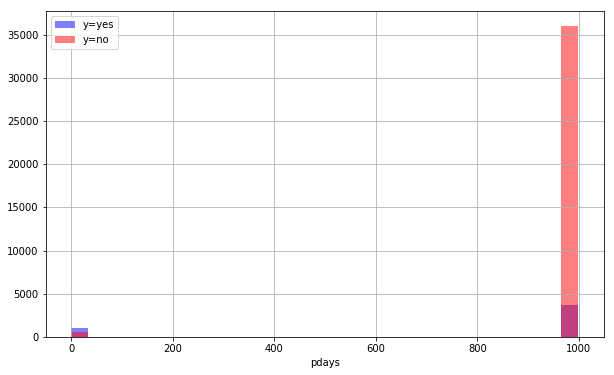

In [16]:
plt.figure(figsize=(10,6))
loans[loans['y']=='yes']['pdays'].hist(alpha=0.5,color='blue',
                                              bins=30,label='y=yes')
loans[loans['y']=='no']['pdays'].hist(alpha=0.5,color='red',
                                              bins=30,label='y=no')
plt.legend()
plt.xlabel('pdays')

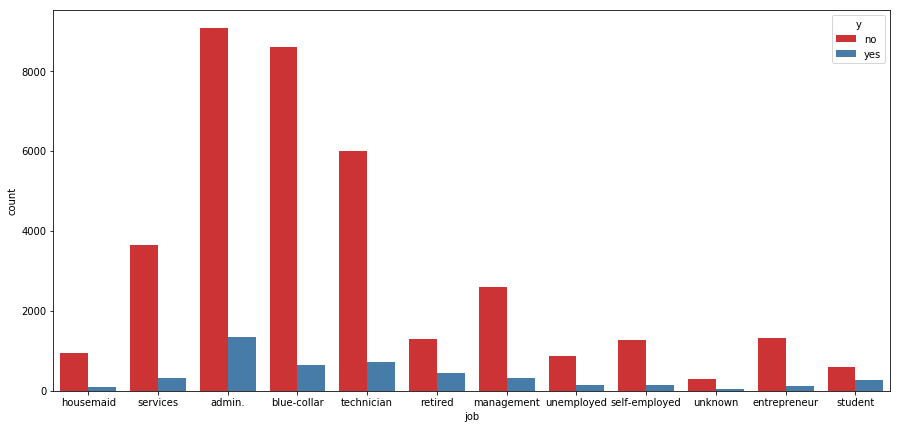

In [17]:
plt.figure(figsize=(15,7))
sns.countplot(x='job',hue='y',data=loans,palette='Set1')

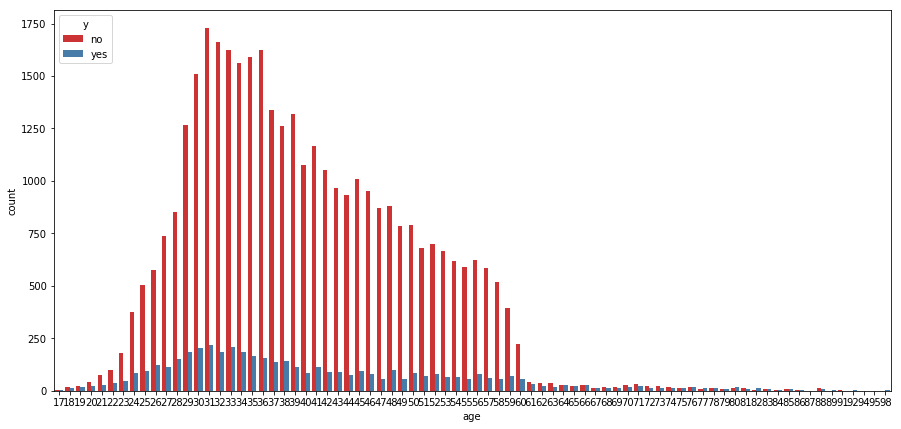

In [18]:
plt.figure(figsize=(15,7))
sns.countplot(x='age',hue='y',data=loans,palette='Set1')

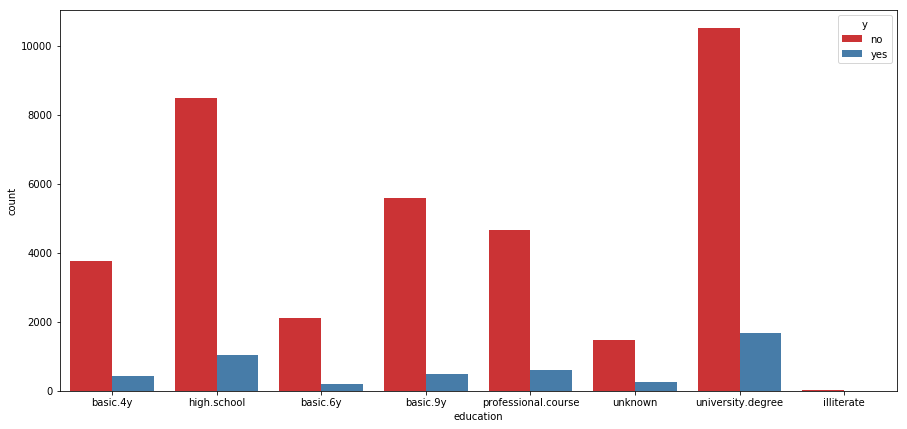

In [19]:
plt.figure(figsize=(15,7))
sns.countplot(x='education',hue='y',data=loans,palette='Set1')

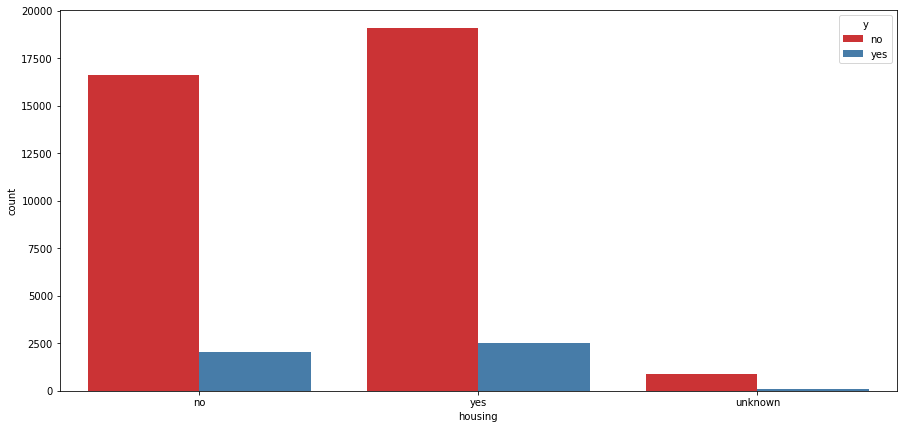

In [20]:
plt.figure(figsize=(15,7))
sns.countplot(x='housing',hue='y',data=loans,palette='Set1')

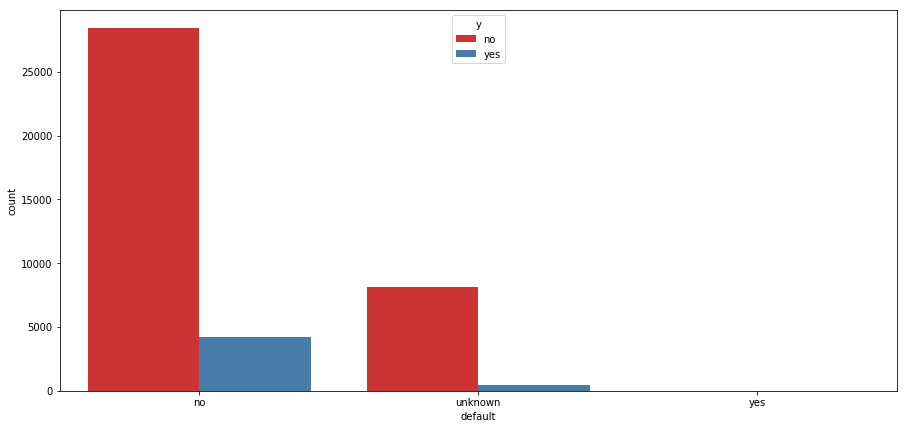

In [21]:
plt.figure(figsize=(15,7))
sns.countplot(x='default',hue='y',data=loans,palette='Set1')

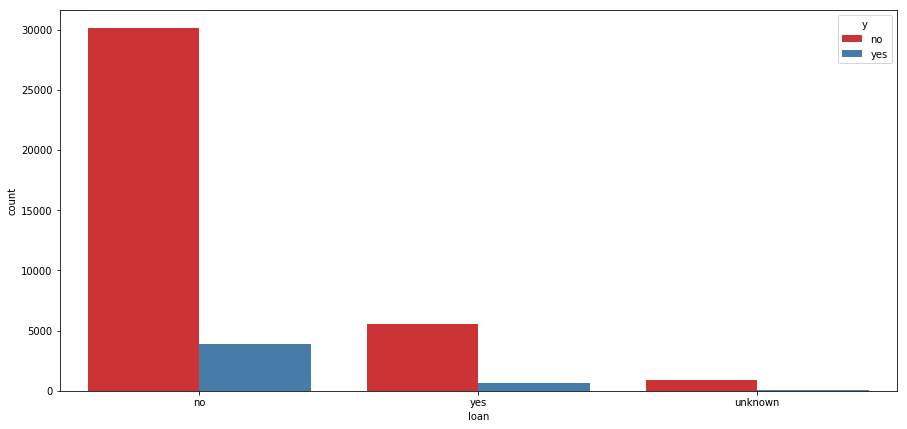

In [22]:
plt.figure(figsize=(15,7))
sns.countplot(x='loan',hue='y',data=loans,palette='Set1')

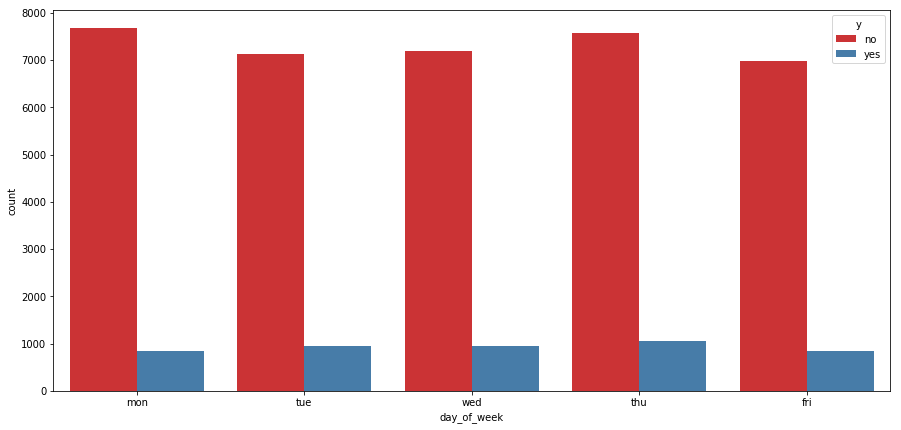

In [23]:
plt.figure(figsize=(15,7))
sns.countplot(x='day_of_week',hue='y',data=loans,palette='Set1')

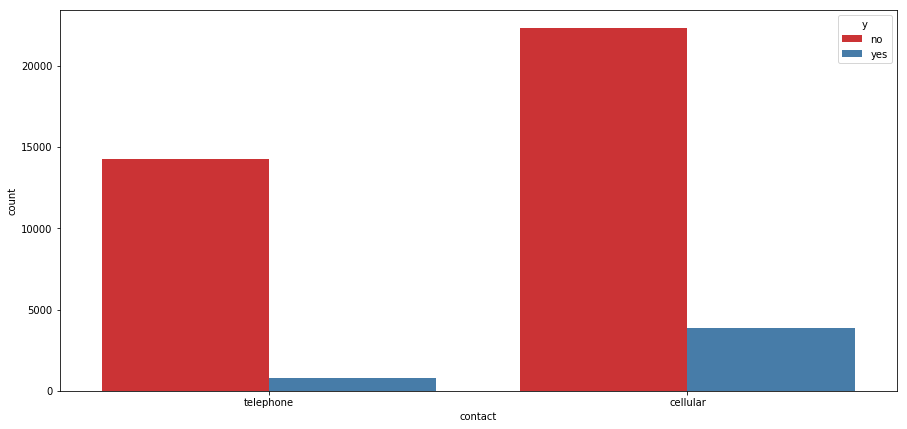

In [24]:
plt.figure(figsize=(15,7))
sns.countplot(x='contact',hue='y',data=loans,palette='Set1')

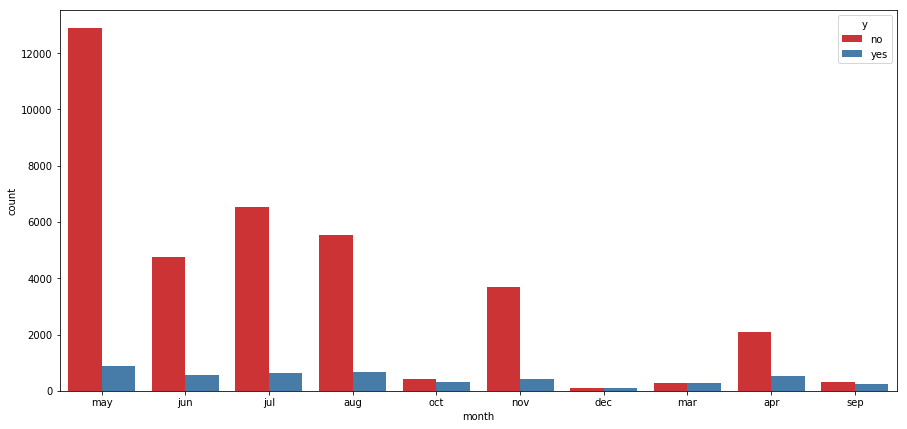

In [25]:
plt.figure(figsize=(15,7))
sns.countplot(x='month',hue='y',data=loans,palette='Set1')

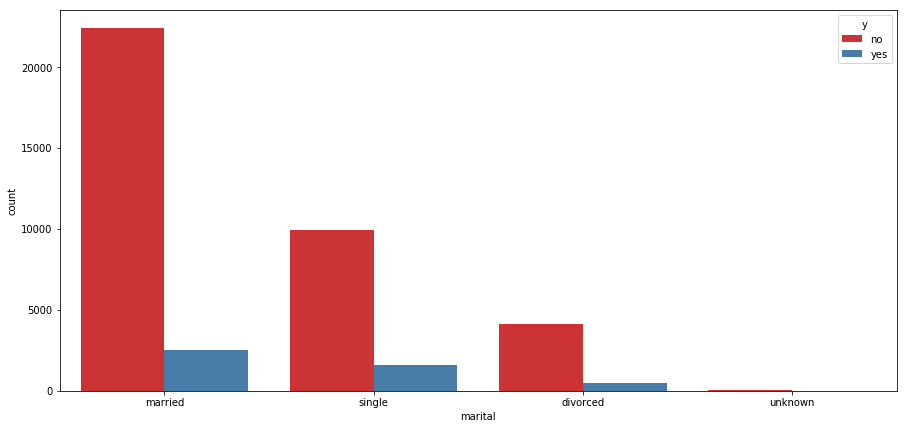

In [26]:
plt.figure(figsize=(15,7))
sns.countplot(x='marital',hue='y',data=loans,palette='Set1')

<Figure size 792x504 with 0 Axes>

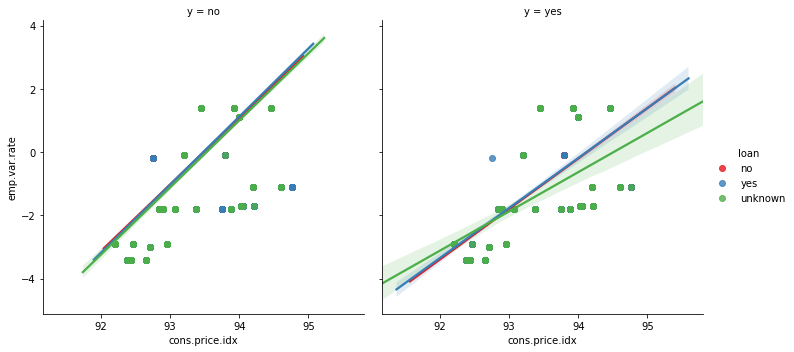

In [27]:
plt.figure(figsize=(11,7))
sns.lmplot(y='emp.var.rate',x='cons.price.idx',data=loans,hue='loan',
           col='y',palette='Set1')

<Figure size 792x504 with 0 Axes>

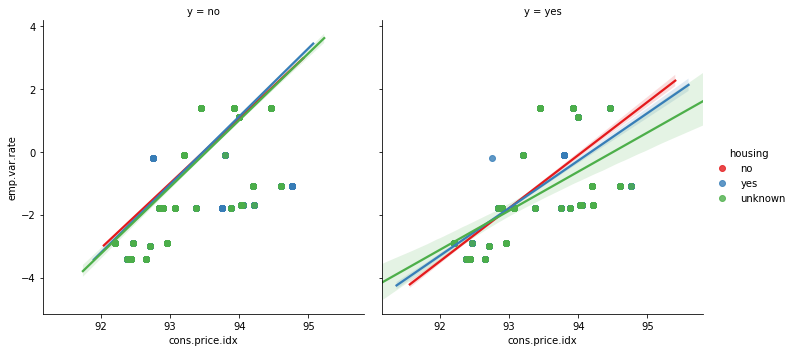

In [28]:
plt.figure(figsize=(11,7))
sns.lmplot(y='emp.var.rate',x='cons.price.idx',data=loans,hue='housing',
           col='y',palette='Set1')

<Figure size 792x504 with 0 Axes>

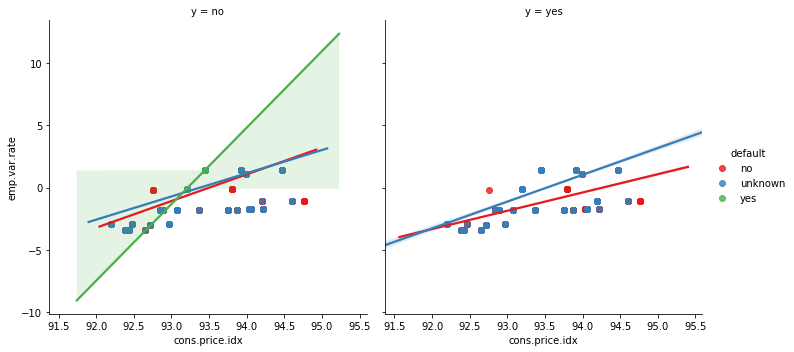

In [29]:
plt.figure(figsize=(11,7))
sns.lmplot(y='emp.var.rate',x='cons.price.idx',data=loans,hue='default',
           col='y',palette='Set1')

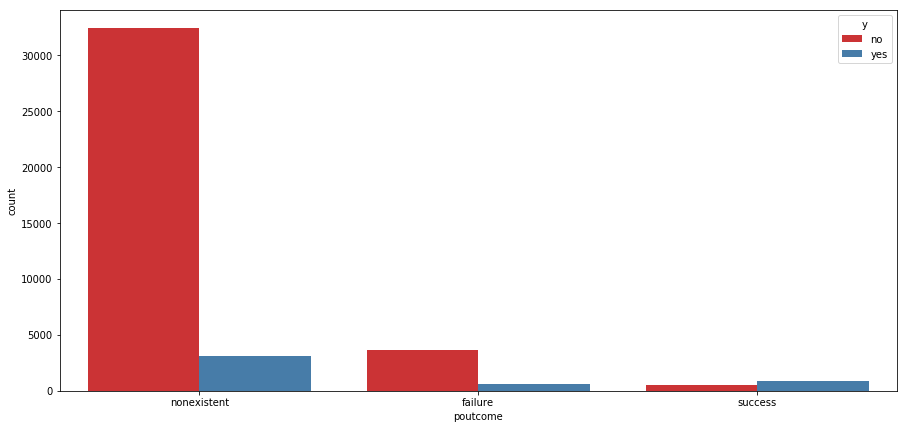

In [30]:
plt.figure(figsize=(15,7))
sns.countplot(x='poutcome',hue='y',data=loans,palette='Set1')

# Setting up the Data

Let's get ready to set up our data for our Decission Tree and Random Forest Classification Models!



In [31]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [35]:
loans_cleaned = loans.copy()

## Data cleaning and encoding for the input of the models

* 1.We need to take a copy of original dataframe instead of touching this.
* 2.We remove the lines with the unknown values so that we have all the valid values in all features.
* 3.We need to drop below columns as based on analysis, we dont find any significant dependency on the target variable
    * Default
    * Day_of_week
    * Education
    * campaign
    * pdays
    * previous
    * housing
    
* 4.Check the shape of the data and the no.of columns we have are the final features to predict the target.

In [36]:
loans_cleaned = loans_cleaned[loans_cleaned['loan']!='unknown']

In [37]:
loans_cleaned = loans_cleaned[loans_cleaned['marital']!='unknown']

In [38]:
loans_cleaned.drop(['default','day_of_week','education','campaign','pdays','previous','housing'],axis=1,inplace=True)

In [39]:
loans_cleaned.shape


(40119, 14)

# We have finalized the data and got 14 features to proceed further

## Categorical Features

That means we need to transform them using dummy variables so sklearn will be able to understand them. 

Let's do this in one clean step using pd.get_dummies.

**Create a list of 1 element containing the coloums to be deleted. Call this list cat_feats.**

In [40]:
cat_feats = ['job','age','loan','contact','month','marital','poutcome']

**Now use pd.get_dummies(loans,columns=cat_feats,drop_first=True) to create a fixed larger dataframe that has new feature columns with dummy variables. Set this dataframe as final_data.**

In [41]:
final_data = pd.get_dummies(loans_cleaned,columns=cat_feats,drop_first=True,prefix_sep='',prefix='')

In [42]:
final_data.head()

,duration,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,blue-collar,entrepreneur,housemaid,...,jun,mar,may,nov,oct,sep,married,single,nonexistent,success
0,261,1.1,93.994,-36.4,4.857,5191.0,no,0,0,1,...,0,0,1,0,0,0,1,0,1,0
1,149,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0,...,0,0,1,0,0,0,1,0,1,0
2,226,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0,...,0,0,1,0,0,0,1,0,1,0
3,151,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0,...,0,0,1,0,0,0,1,0,1,0
4,307,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0,...,0,0,1,0,0,0,1,0,1,0


## Now we need to convert the target variable from string ('yes'/'no') to binary(1/0)

In [43]:
final_data['y']=final_data['y'].apply(lambda x: 1 if x=='yes' else 0)

## Train Test Split

Now its time to split our data into a training set and a testing set!

** Use sklearn to split your data into a training set and a testing set as we've done in the past.**

In [44]:
final_data['y'].value_counts()

0    35598
1     4521
Name: y, dtype: int64

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X = final_data.drop('y',axis=1)
y = final_data['y']


## Training the models


**Create an instance of DecisionTreeClassifier() called dtree and fit it to the training data.**

We create below functions for the prediction of each parameter and create a graph and table of predictions to select the best parameter for the model.

**DecissionTreeClassifier Model**
**Function names**
* 1.testsizeSelector() - To select best value for the testsize out of 20%,40% and 50% for the model.
* 2.max_depth_sel() - To select best value for the parameter **"max_depth"**
* 3.min_samples_sel() - To select best value for the parameter **"min_samples_split"**
* 4.max_features_sel() - To select best value for the parameter **"max_features"**

**RandomForestClassifier Model**
**Funcion names**
* 1.rfctestsizeSelector() - To select best value for the testsize out of 20%,40% and 50% for the model.
* 2.rfc_estimators_sel() - To select best value for the parameter **"n_estimators"**
* 3.rfc_max_depth_sel() - To select best value for the parameter **"max_depth"**
* 4.rfc_min_samples_sel() - To select best value for the parameter **"min_samples_split"**
* 5.rfc_max_features_sel() - To select best value for the parameter **"max_features"**


## Predictions and Evaluation of Decision Tree
**Create predictions from the test set and create a classification report and a confusion matrix.**

In [47]:
def testsizeSelector(i):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i, random_state=101)
    
    from sklearn.tree import DecisionTreeClassifier
    dtree = DecisionTreeClassifier()
    dtree.fit(X_train,y_train)
    from sklearn.metrics import roc_curve, auc,accuracy_score
    preds = dtree.predict(X_test)
    return accuracy_score(preds,y_test)

results = pd.DataFrame([0.2,0.4,0.5],columns=['test_size'])
results['accuracy_score']  = results['test_size'].apply(testsizeSelector)
results

,test_size,accuracy_score
0,0.2,0.892198
1,0.4,0.889644
2,0.5,0.890279


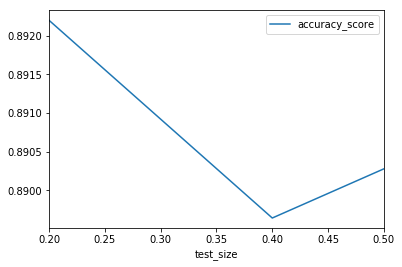

In [48]:
results.plot('test_size','accuracy_score')

## Predictions and Evaluation

* Now we are able to come to a decission on the test size to be selected for the model that, irrespective of the parameters selected, DecissionTreeClassifier performs better with the testsize of 0.2.

* So , we proceed for the parameters selection with the test size of 0.2

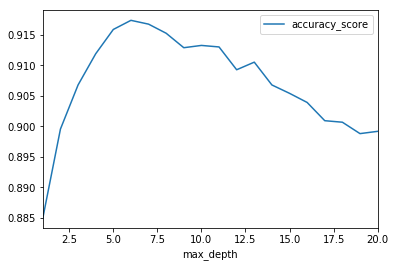

In [49]:
def max_depth_sel(i):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
    
    from sklearn.tree import DecisionTreeClassifier
    dtree = DecisionTreeClassifier(max_depth=i)
    dtree.fit(X_train,y_train)
    from sklearn.metrics import roc_curve, auc,accuracy_score
    preds = dtree.predict(X_test)
    return accuracy_score(preds,y_test)

resmaxdept = pd.DataFrame(np.linspace(1,20,20,endpoint=True),columns=['max_depth'])
resmaxdept['accuracy_score']  = resmaxdept['max_depth'].apply(max_depth_sel)
resmaxdept.plot('max_depth','accuracy_score')

In [50]:
resmaxdept

,max_depth,accuracy_score
0,1.0,0.884970
1,2.0,0.899551
2,3.0,0.906780
3,4.0,0.911889
4,5.0,0.915877
5,6.0,0.917373
6,7.0,0.916750
7,8.0,0.915254
8,9.0,0.912886
9,10.0,0.913260


**Here we can conclude that the best value for the parameter max_depth is "7" as accuracy is maxium and from there the accuracy value starts to decrease.**

**Hence we proceed with that value further.**

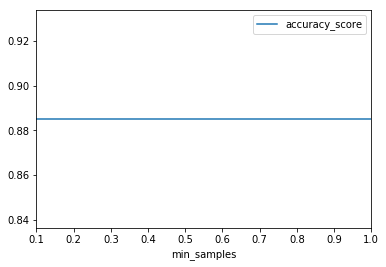

In [52]:
def min_samples_sel(i):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
    
    from sklearn.tree import DecisionTreeClassifier
    dtree = DecisionTreeClassifier(max_depth=7,min_samples_split=i)
    dtree.fit(X_train,y_train)
    from sklearn.metrics import roc_curve, auc,accuracy_score
    preds = dtree.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, preds)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    return accuracy_score(preds,y_test)

minsamples = pd.DataFrame(np.linspace(0.1,1,10,endpoint=True),columns=['min_samples'])
minsamples['accuracy_score']  = minsamples['min_samples'].apply(max_depth_sel)
minsamples.plot('min_samples','accuracy_score')

In [54]:
minsamples

,min_samples,accuracy_score
0,0.1,0.88497
1,0.2,0.88497
2,0.3,0.88497
3,0.4,0.88497
4,0.5,0.88497
5,0.6,0.88497
6,0.7,0.88497
7,0.8,0.88497
8,0.9,0.88497
9,1.0,0.88497


**Here we can conclude that there is no best value for the parameter min_samples_split as it is same for all the values**

**Hence we can ignore this parameter in the model.**

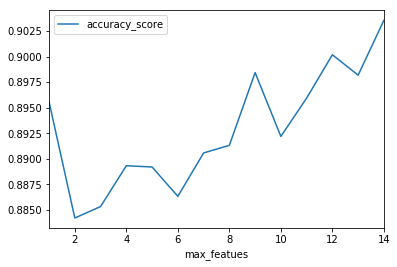

In [55]:
def max_features_sel(i):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
    
    from sklearn.tree import DecisionTreeClassifier
    dtree = DecisionTreeClassifier(max_depth=7,max_features=i)
    dtree.fit(X_train,y_train)
    from sklearn.metrics import roc_curve, auc,accuracy_score
    preds = dtree.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, preds)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    return accuracy_score(preds,y_test)

maxfeatures = pd.DataFrame(list(range(1,15)),columns=['max_featues'])
maxfeatures['accuracy_score']  = maxfeatures['max_featues'].apply(max_features_sel)
maxfeatures.plot('max_featues','accuracy_score')

In [56]:
maxfeatures

,max_featues,accuracy_score
0,1,0.895563
1,2,0.884222
2,3,0.885344
3,4,0.889332
4,5,0.889207
5,6,0.886341
6,7,0.890578
7,8,0.891326
8,9,0.898430
9,10,0.892198


**Here we can conclude that the best value for the parameter max_features is "13" as after that accuaracy reduces.**

**Now that we have decided the parameters that are best fot this model, we shall proceed further and get the predictions from this model on the test data**

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=6,max_features=13)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=13, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [58]:
predictions = dtree.predict(X_test)

## We now look at the confusion matrix and classification report of the predictions

In [59]:
from sklearn.metrics import classification_report,confusion_matrix,f1_score,accuracy_score

In [60]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           0       0.99      0.90      0.94      7759
           1       0.18      0.63      0.28       265

   micro avg       0.89      0.89      0.89      8024
   macro avg       0.58      0.76      0.61      8024
weighted avg       0.96      0.89      0.92      8024



In [61]:
print(confusion_matrix(predictions,y_test))

[[7002  757]
 [  99  166]]


## Inferences from the DecissionTreeClassifier Model

**We can see that the overall average of f1-score which is a trade-off between the accuracy and precission have come to be 89% by using the Decission Tree Algorith for prediction**

**We shall do the same process for the RandomForestClassifier model and get the inferences for it**

## Training the Random Forest model


In [62]:
def rfctestsizeSelector(i):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i, random_state=101)
    
    from sklearn.ensemble import RandomForestClassifier
    rfc = RandomForestClassifier()
    rfc.fit(X_train,y_train)
    from sklearn.metrics import roc_curve, auc
    preds = rfc.predict(X_test)
    return accuracy_score(preds,y_test)

rfctest = pd.DataFrame([0.2,0.4,0.5],columns=['test_size'])
rfctest['accuracy_score']  = rfctest['test_size'].apply(rfctestsizeSelector)
rfctest

C:\Users\USER\Anaconda3\envs\env_py2\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


,test_size,accuracy_score
0,0.2,0.911765
1,0.4,0.908151
2,0.5,0.906431


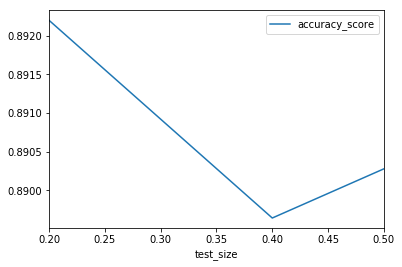

In [63]:
results.plot('test_size','accuracy_score')

## Predictions and Evaluation

* Now we are able to come to a decission on the test size to be selected for the model that, irrespective of the parameters selected, RandomForestClassifier performs better with the testsize of 0.2.

* So , we proceed for the parameters selection with the test size of 0.2

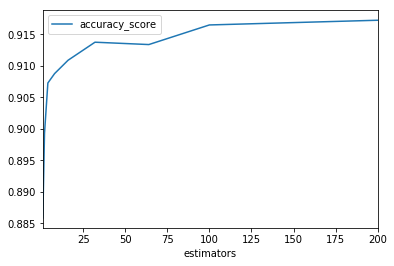

In [65]:
def rfc_estimators_sel(i):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
    
    from sklearn.ensemble import RandomForestClassifier
    rfc = RandomForestClassifier(n_estimators=i)
    rfc.fit(X_train,y_train)
    from sklearn.metrics import roc_curve, auc,accuracy_score
    preds = rfc.predict(X_test)
    return accuracy_score(preds,y_test)

rfcestim = pd.DataFrame([1, 2, 4, 8, 16, 32, 64, 100,200],columns=['estimators'])
rfcestim['accuracy_score']  = rfcestim['estimators'].apply(rfc_estimators_sel)
rfcestim.plot('estimators','accuracy_score')

In [66]:
rfcestim

,estimators,accuracy_score
0,1,0.885842
1,2,0.899302
2,4,0.907278
3,8,0.908774
4,16,0.910892
5,32,0.913759
6,64,0.913385
7,100,0.916500
8,200,0.917248


**We have cycled through the values upto 200 and we can observe that the no.of estimators parameter values of 200 seems to be a saturation point and going above that can be a computationally challenging decission.**

**So we choose 200 for the n_estimators value and move further**

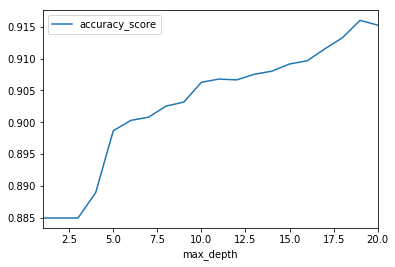

In [67]:
def rfc_max_depth_sel(i):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
    
    from sklearn.ensemble import RandomForestClassifier
    rfc = RandomForestClassifier(n_estimators=200,max_depth=i)
    rfc.fit(X_train,y_train)
    from sklearn.metrics import roc_curve, auc,accuracy_score
    preds = rfc.predict(X_test)
    return accuracy_score(preds,y_test)

rfcmaxdept = pd.DataFrame(np.linspace(1,20,20,endpoint=True),columns=['max_depth'])
rfcmaxdept['accuracy_score']  = rfcmaxdept['max_depth'].apply(rfc_max_depth_sel)
rfcmaxdept.plot('max_depth','accuracy_score')

In [68]:
rfcmaxdept

,max_depth,accuracy_score
0,1.0,0.884970
1,2.0,0.884970
2,3.0,0.884970
3,4.0,0.888958
4,5.0,0.898679
5,6.0,0.900299
6,7.0,0.900798
7,8.0,0.902542
8,9.0,0.903166
9,10.0,0.906281


**Here we can conclude that the best value for the parameter max_depth is "19" as accuracy is maxium and from there the accuracy value starts to decrease.**

**Hence we proceed with that value further.**

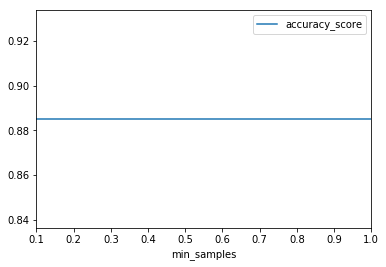

In [69]:
def rfc_min_samples_sel(i):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
    
    from sklearn.ensemble import RandomForestClassifier
    dtree = RandomForestClassifier(n_estimators=200,max_depth=19,min_samples_split=i)
    dtree.fit(X_train,y_train)
    from sklearn.metrics import roc_curve, auc,accuracy_score
    preds = dtree.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, preds)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    return accuracy_score(preds,y_test)

rfcminsamples = pd.DataFrame(np.linspace(0.1,1,10,endpoint=True),columns=['min_samples'])
rfcminsamples['accuracy_score']  = rfcminsamples['min_samples'].apply(rfc_min_samples_sel)
rfcminsamples.plot('min_samples','accuracy_score')

**Here we can conclude that there is no best value for the parameter min_samples_split as it is same for all the values**

**Hence we can ignore this parameter in the model.**

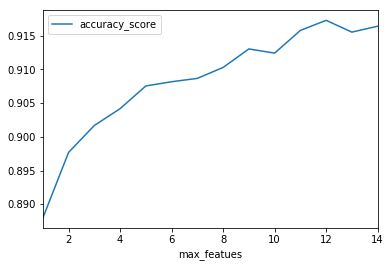

In [70]:
def rfc_max_features_sel(i):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
    
    from sklearn.ensemble import RandomForestClassifier
    rfc = RandomForestClassifier(n_estimators=200,max_depth=19,max_features=i)
    rfc.fit(X_train,y_train)
    from sklearn.metrics import roc_curve, auc,accuracy_score
    preds = rfc.predict(X_test)
    return accuracy_score(preds,y_test)

rfcmaxfeatures = pd.DataFrame(list(range(1,15)),columns=['max_featues'])
rfcmaxfeatures['accuracy_score']  = rfcmaxfeatures['max_featues'].apply(rfc_max_features_sel)
rfcmaxfeatures.plot('max_featues','accuracy_score')

In [71]:
rfcmaxfeatures

,max_featues,accuracy_score
0,1,0.887961
1,2,0.897682
2,3,0.901670
3,4,0.904163
4,5,0.907527
5,6,0.908151
6,7,0.908649
7,8,0.910269
8,9,0.913011
9,10,0.912388


**Here we can conclude that the best value for the parameter max_features is "12" as after that accuaracy reduces.**

**Now that we have decided the parameters that are best fot this model, we shall proceed further and get the predictions from this model on the test data**

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200,max_depth=19,max_features=12)
rfc.fit(X_train,y_train)
from sklearn.metrics import roc_curve, auc,accuracy_score
rfc_preds = rfc.predict(X_test)

## We now look at the confusion matrix and classification report of the predictions

In [74]:
print(classification_report(y_test,rfc_preds))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      7101
           1       0.72      0.43      0.54       923

   micro avg       0.92      0.92      0.92      8024
   macro avg       0.83      0.70      0.75      8024
weighted avg       0.91      0.92      0.91      8024



In [75]:
print(confusion_matrix(y_test,rfc_preds))

[[6949  152]
 [ 525  398]]


## Inferences from the RandomForestClassifier Model

**We can see that the overall average of f1-score which is a trade-off between the accuracy and precission have come to be 92% by using the Random Forest Algorith for prediction**


## Conclusion by selecting the best model for the data ##

**Analysis on what performed better the random forest or the decision tree based on the outcomes and parameter selection**

**Inferences from the DecissionTreeClassifier:**

* True-Positive Values = 166
* True-Negative Values = 7002
* False Positive Values = 757
* False Negative Values = 99

**Deciding Factors**

* Average F1-Score = **0.89**

* Average Precission = **0.89**

* Average Recall = **0.89**

* True Predictions = True Positives + True Negatives = **7168**

**Inferences from the DecissionTreeClassifier:**

* True-Positive Values = 398
* True-Negative Values = 6949
* False Positive Values = 152
* False Negative Values = 525

**Deciding Factors**

* Average F1-Score = **0.92**

* Average Precission = **0.92**

* Average Recall = **0.92**

* True Predictions = True Positives + True Negatives = **7347**

## Best Model award goes to... "Random Forest Classifier" !



**From the Confusion Matrix and Classification reports of both the models above we can infer below points:**


* 1. **Classification Accuracy** : The no.of correct predictions of Random Forest Model is **179** more than the 
       Decission Tree Model
* 2. **Precission** : The average precission for the Random Forest Model is **0.4** more than the Decission Tree Model.
* 3. **Recall** : The average recall for the Random Forest Model is **0.4** more than the Decission Tree Model.
* 4. **F1-Score** : The average F1-Score of the Random Forest Model is **0.4** more than the Decission Tree Model.

These are the most deciding factors of the best model in which the **RandomForestClassifier** have **outperformed** the **DecissionTreeClassifier.**


Hence we finally concludes that the **"Random Forest Model"** is a preferred Model for classification.